# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 Capomulin and Ramicane seem to reduce tumor sizes significantly compared to other drugs.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [36]:
# Checking the number of mice.
results["Mouse ID"].nunique()

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
results.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head()

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id = results["Mouse ID"] != "g989"
results2 = results.loc[mouse_id].reset_index(drop=True)
results2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [35]:
# Checking the number of mice in the clean DataFrame.
results2["Mouse ID"].nunique()

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = results2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = results2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = results2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds = results2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = results2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
pd.DataFrame({"Mean": means,
             "Medians": medians,
             "Var": variances,
             "Std": stds,
             "Sem": sems})

,Mean,Medians,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
results2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

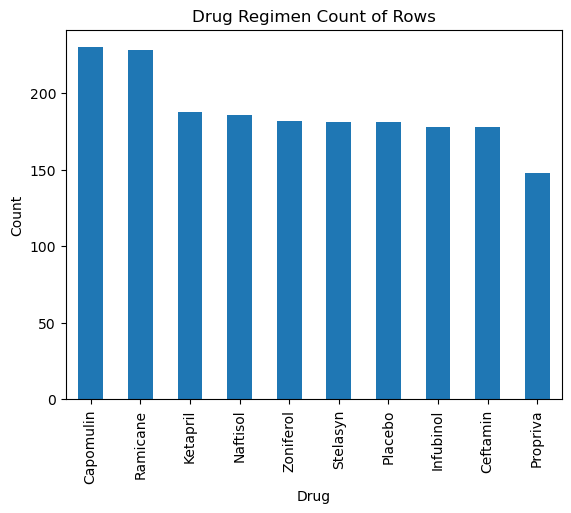

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
vals = results2["Drug Regimen"].value_counts()
vals.plot(kind="bar", xlabel="Drug", ylabel="Count", title="Drug Regimen Count of Rows")
plt.show()

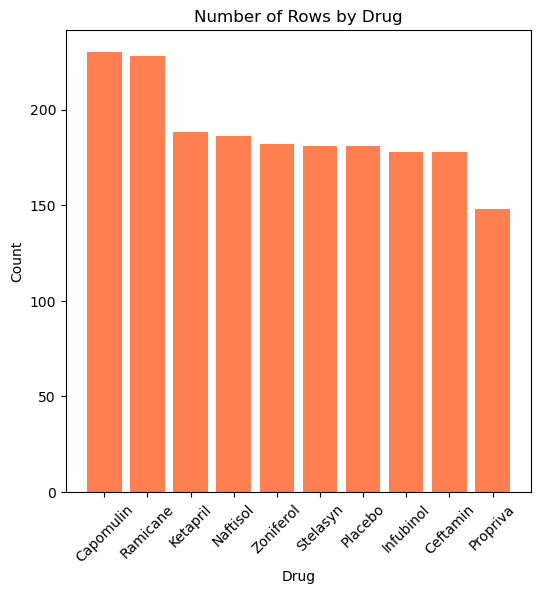

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
vals = results2["Drug Regimen"].value_counts()

plt.figure(figsize=(6, 6))
plt.bar(vals.index, vals, color="coral")

plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Number of Rows by Drug")
plt.xticks(rotation=45)
plt.show()

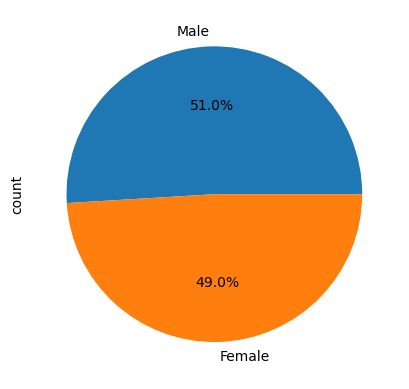

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
vals = results2["Sex"].value_counts()

vals.plot(kind="pie", autopct='%1.1f%%')
plt.show()

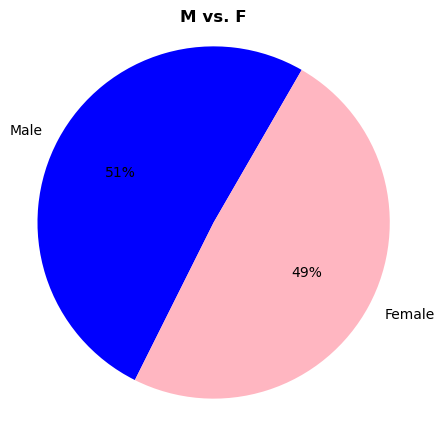

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "lightpink"]
pies = vals.index
pie_votes = vals
plt.figure(figsize=(5,5))
plt.pie(pie_votes, labels = pies, colors=colors, autopct="%1.0f%%", startangle=60)

# step 3 - customize it
plt.title("M vs. F", fontweight="bold", fontsize=12)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
results2.head()
# Start by getting the last (greatest) timepoint for each mouse
max_time = results2.groupby("Mouse ID", as_index = False).Timepoint.max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
results3 = pd.merge(max_time , results2, on = ["Mouse ID", "Timepoint"], how = "left")
results3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [72]:
import seaborn as sns

In [88]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
     sub = results3.loc[results3["Drug Regimen"] == drug]
    
    # add subset 
tumor = sub["Tumor Volume (mm3)"]
tumor_vol.append(tumor)
    
    # Determine outliers using upper and lower bounds
quartiles = tumor.quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
print(drug)
print(outliers)

Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


<Axes: xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

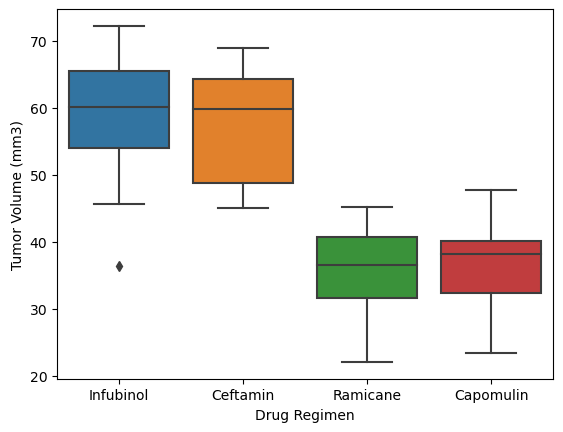

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
results4 = results3.loc[results3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
sns.boxplot(results4, x= "Drug Regimen", y = "Tumor Volume (mm3)")

In [114]:
results2.loc[results2["Drug Regimen"] == "Capomulin"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


## Line and Scatter Plots

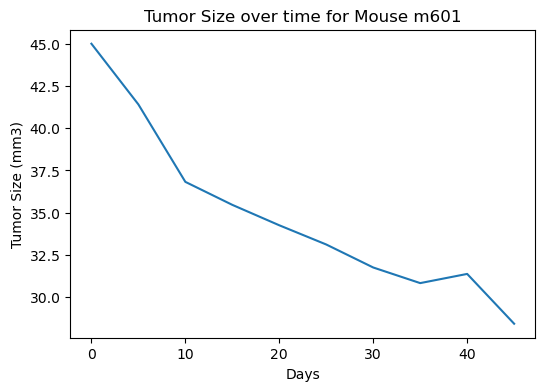

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "m601"

sub_mouse = results2.loc[results2["Mouse ID"] == mouse]

plt.figure(figsize=(6,4))
plt.plot(sub_mouse.Timepoint, sub_mouse["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Size (mm3)")
plt.title(f"Tumor Size over time for Mouse {mouse}")
plt.show()

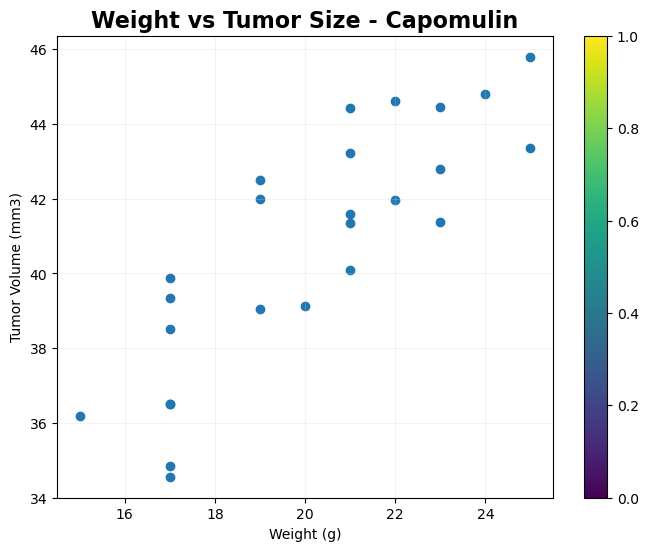

In [105]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(8,6))
cap_df = results2.loc[results2["Drug Regimen"] == "Capomulin"]

data = cap_df.groupby("Mouse ID", as_index=False).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"])

# step 3 - customize it

# title/labels
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Size - Capomulin", fontweight="bold", fontsize=16)

# add grid
plt.grid(color="lightgrey", alpha=0.25)

# gradient legend
plt.colorbar()

# step 4 - show/save it
plt.show()

In [99]:
from scipy.stats import linregress

## Correlation and Regression

ValueError: could not convert string to float: 'b128'

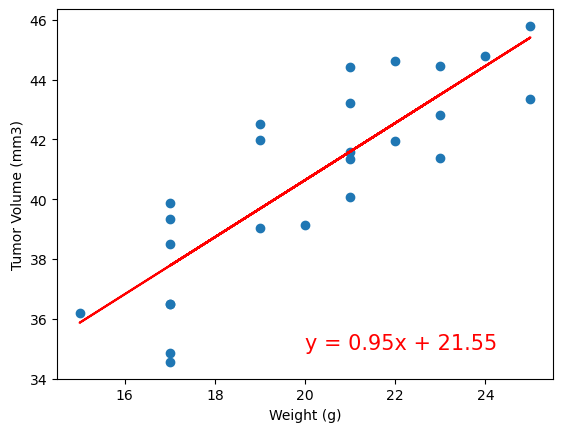

In [107]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = data["Weight (g)"]
y_values = data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 35),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

corr = data.corr()["Weight (g)"]["Tumor Volume (mm3)"]
print(f"The correlation is {corr}")
print(f"The r-squared is: {rvalue**2}")
plt.show()